In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


initialisation

In [47]:
meal_data_path = 'meal_data.xlsx'
meal_data = pd.read_excel(meal_data_path)
meal_data.head()

,item_name,course_type,subcategories,meal_type,cost,nf_calories,nf_calories_from_fat,nf_total_fat,nf_saturated_fat,nf_trans_fatty_acid,...,nf_vitamin_a_dv,nf_vitamin_c_dv,nf_calcium_dv,nf_iron_dv,nf_potassium,nf_servings_per_container,nf_serving_size_qty,nf_serving_size_unit,nf_serving_weight_grams,images_front_full_url
0,Trick OR Treat Ice Cream,Soup,cream,NaN,2.08,300.00,140.0,16.0,9.0,0.0,...,8.0,2.0,15.0,4.0,NaN,NaN,4.00,oz scoops,NaN,NaN
1,Sweet Fries Snack,Side,fried,NaN,2.27,1150.00,690.0,79.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.40,oz,NaN,NaN
2,Tomatoes - Salad,Side,red orange,NaN,3.45,9.58,2.4,0.0,0.0,0.0,...,5.0,14.0,0.0,0.0,NaN,NaN,45.52,Grams,45.52,NaN
3,Chicken BBQ Caesar Salad EntrÌ©e,Main dish,poultry,NaN,3.95,203.00,NaN,NaN,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.00,servings,NaN,NaN
4,Corn and Black Bean Salad,Side,legume,NaN,3.59,140.00,10.0,1.0,0.0,0.0,...,2.0,4.0,2.0,10.0,NaN,NaN,1.00,Salad,NaN,NaN


In [48]:
score_preference_path = 'score_preference.xlsx'
score_preference = pd.read_excel(score_preference_path)
score_preference.set_index('Unnamed: 0', inplace=True)
score_preference.head()

,Trick OR Treat Ice Cream,Sweet Fries Snack,Tomatoes - Salad,Chicken BBQ Caesar Salad EntrÌ©e,Corn and Black Bean Salad,Mango Cake,Egg,"Flavored Fresh Lemonade, Peach",Add Pirate Tossed Salad,Blueberry Vinaigrette,...,Vegetable Spring Rolls,All Natural Spinach Hummus,Cooked Mushrooms,Green Pepper And Onion Omelette,Pork Gyoza Pot Stickers Pork and Vegetable Dumplings,Whole Grain Waffle,xiao main,"Burrito Main, Braised Pork Carnitas","Nachos Main, Braised Pork Carnitas",Sausage Pizza Deep Dish
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1,3,3,3,3,2,1,2,3,1,...,2,2,2,3,3,3,1,1,1,1
1,3,2,1,1,1,3,3,2,3,1,...,1,1,1,2,1,3,3,1,1,3
2,3,2,3,2,2,2,2,2,1,3,...,2,2,2,3,1,3,3,2,3,2
3,1,2,1,2,3,3,1,1,1,2,...,3,2,1,1,3,1,3,1,3,1
4,2,1,1,3,1,1,3,3,1,1,...,1,2,2,2,2,1,1,2,3,3


In [49]:
nutrition_criteria_path = 'nutrition_criteria.xlsx'
nutrition_criteria = pd.read_excel(nutrition_criteria_path)
nutrition_criteria.head()


,ID,Element,F,M,Average
0,1,Calories,1600,2000,1800
1,2,Sodium,2300,2300,2300
2,3,Carbohydrate,130,130,130
3,4,Dietary_fiber,22,28,25
4,5,Protein,46,56,51


In [50]:
num_item = 130
# calculate pi
X = score_preference.copy()
features = list(X.columns)
X = X.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5) 
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca) 
score_preference['cluster'] = clusters

def p_score(score_preference, p_number):
    score_mean = pd.DataFrame()

    total_samples = len(score_preference)
    p_weight = []
    for cluster_label in range(p_number):
        cluster_size = len(score_preference[score_preference['cluster'] == cluster_label])
        p_weight.append(cluster_size / total_samples)

    for i, p_weight in enumerate(p_weight):
        print(f"p {i+1}: {p_weight:.2f}")

    for cluster_label in range(p_number):
        cluster_data = score_preference[score_preference['cluster'] == cluster_label] 
        cluster_mean = cluster_data.drop('cluster', axis=1).mean() 
        score_mean[cluster_label] = cluster_mean 

    score_mean = score_mean.T
    print("\nAverage values for each p:")
    print(score_mean)

    return p_weight, score_mean

p_score(score_preference, p_number=3)
p_weight, score_mean = p_score(score_preference, p_number=3)
patron_cluster = dict(enumerate(clusters))

item_names = [meal_data.loc[i, "item_name"] for i in range(num_item)]

pi = { p: { i: 0 for i in range(num_item) } for p in range(3) }
for p in range(3):
    for i in range(num_item):
        dish_name = item_names[i]
        try:
            pi[p][i] = score_mean.loc[p, dish_name]
        except KeyError:
            print(f"在 score_mean 中未找到聚类 {p} 对应的菜品 {dish_name} 数据，默认赋值为0")
            pi[p][i] = 0

# check pi
for p in range(3):
    print(f"聚类 {p} 对各菜品的偏好得分：", pi[p])
pi

p 1: 0.36
p 2: 0.29
p 3: 0.36

Average values for each p:
   Trick OR Treat Ice Cream  Sweet Fries Snack  Tomatoes - Salad  \
0                      1.70              1.800             1.500   
1                      1.75              2.125             2.625   
2                      2.30              2.100             2.300   

   Chicken BBQ Caesar Salad EntrÌ©e  Corn and Black Bean Salad  Mango Cake  \
0                             2.700                       1.60       1.800   
1                             2.375                       2.75       1.625   
2                             2.200                       2.30       2.300   

   Egg  Flavored Fresh Lemonade, Peach  Add Pirate Tossed Salad  \
0  1.8                             2.0                    1.500   
1  2.0                             2.0                    2.625   
2  1.9                             2.2                    1.900   

   Blueberry Vinaigrette  ...  Vegetable Spring Rolls  \
0                    1.6  ... 

C:\Users\DI\AppData\Local\Temp\ipykernel_21512\954220843.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  score_preference['cluster'] = clusters


{0: {0: 1.7,
  1: 1.8,
  2: 1.5,
  3: 2.7,
  4: 1.6,
  5: 1.8,
  6: 1.8,
  7: 2.0,
  8: 1.5,
  9: 1.6,
  10: 1.4,
  11: 2.6,
  12: 2.3,
  13: 1.7,
  14: 1.6,
  15: 2.0,
  16: 1.9,
  17: 2.1,
  18: 2.6,
  19: 2.4,
  20: 1.8,
  21: 2.3,
  22: 1.9,
  23: 2.0,
  24: 1.9,
  25: 2.2,
  26: 2.6,
  27: 1.6,
  28: 2.1,
  29: 2.0,
  30: 2.0,
  31: 2.3,
  32: 2.3,
  33: 1.8,
  34: 1.4,
  35: 2.0,
  36: 2.3,
  37: 2.1,
  38: 2.2,
  39: 2.2,
  40: 2.6,
  41: 2.0,
  42: 1.6,
  43: 1.8,
  44: 2.5,
  45: 2.0,
  46: 2.5,
  47: 2.1,
  48: 1.7,
  49: 2.0,
  50: 1.9,
  51: 2.3,
  52: 2.2,
  53: 1.9,
  54: 2.2,
  55: 1.4,
  56: 1.7,
  57: 1.8,
  58: 1.7,
  59: 2.5,
  60: 1.5,
  61: 1.9,
  62: 1.9,
  63: 1.5,
  64: 2.0,
  65: 1.8,
  66: 2.3,
  67: 2.2,
  68: 2.0,
  69: 2.1,
  70: 1.5,
  71: 1.1,
  72: 1.3,
  73: 2.5,
  74: 1.5,
  75: 1.7,
  76: 2.6,
  77: 1.8,
  78: 1.8,
  79: 2.0,
  80: 1.9,
  81: 2.3,
  82: 2.3,
  83: 2.1,
  84: 2.4,
  85: 1.6,
  86: 1.4,
  87: 2.2,
  88: 1.6,
  89: 2.0,
  90: 2.4,
  91: 

In [ ]:
# 假设数据格式：
# nutrition_df: 130行 × K列（营养元素）
# cluster_scores: 3行 × 130列（群体评分均值）

# 数据预处理：评分归一化
scores_normalized = score_mean.div(score_mean.sum(axis=1), axis=0)*1000
anaylsis_scores = scores_normalized.T
# 修改所有列名
anaylsis_scores.columns = ['P1', 'P2', 'P3']

anaylsis_scores

,P1,P2,P3
Trick OR Treat Ice Cream,6.561173,6.641366,8.695652
Sweet Fries Snack,6.947125,8.064516,7.939509
Tomatoes - Salad,5.789271,9.962049,8.695652
Chicken BBQ Caesar Salad EntrÌ©e,10.420687,9.013283,8.317580
Corn and Black Bean Salad,6.175222,10.436433,8.695652
...,...,...,...
Whole Grain Waffle,7.333076,4.269450,7.561437
xiao main,5.403319,6.641366,8.317580
"Burrito Main, Braised Pork Carnitas",9.648784,5.218216,6.427221
"Nachos Main, Braised Pork Carnitas",9.262833,6.641366,6.805293


In [70]:
print(meal_data.index)

RangeIndex(start=0, stop=130, step=1)


In [71]:
anaylsis_scores = anaylsis_scores.reset_index(drop=True)
print(anaylsis_scores.index)


RangeIndex(start=0, stop=130, step=1)


In [72]:
anaylsis_combined = pd.concat([meal_data, anaylsis_scores], axis=1)
anaylsis_combined

,item_name,course_type,subcategories,meal_type,cost,nf_calories,nf_calories_from_fat,nf_total_fat,nf_saturated_fat,nf_trans_fatty_acid,...,nf_iron_dv,nf_potassium,nf_servings_per_container,nf_serving_size_qty,nf_serving_size_unit,nf_serving_weight_grams,images_front_full_url,P1,P2,P3
0,Trick OR Treat Ice Cream,Soup,cream,NaN,2.08,300.00,140.0,16.0,9.0,0.0,...,4.0,NaN,NaN,4.00,oz scoops,NaN,NaN,6.561173,6.641366,8.695652
1,Sweet Fries Snack,Side,fried,NaN,2.27,1150.00,690.0,79.0,7.0,0.0,...,NaN,NaN,NaN,13.40,oz,NaN,NaN,6.947125,8.064516,7.939509
2,Tomatoes - Salad,Side,red orange,NaN,3.45,9.58,2.4,0.0,0.0,0.0,...,0.0,NaN,NaN,45.52,Grams,45.52,NaN,5.789271,9.962049,8.695652
3,Chicken BBQ Caesar Salad EntrÌ©e,Main dish,poultry,NaN,3.95,203.00,NaN,NaN,2.1,NaN,...,NaN,NaN,NaN,2.00,servings,NaN,NaN,10.420687,9.013283,8.317580
4,Corn and Black Bean Salad,Side,legume,NaN,3.59,140.00,10.0,1.0,0.0,0.0,...,10.0,NaN,NaN,1.00,Salad,NaN,NaN,6.175222,10.436433,8.695652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Whole Grain Waffle,Main dish,grain,NaN,1.86,120.00,30.0,3.0,1.0,0.0,...,8.0,80.0,1.0,1.00,piece,50.00,NaN,7.333076,4.269450,7.561437
126,xiao main,Main dish,pasta,NaN,3.25,300.00,100.0,8.0,1.5,0.0,...,10.0,200.0,1.0,1.00,bowl,300.00,NaN,5.403319,6.641366,8.317580
127,"Burrito Main, Braised Pork Carnitas",Main dish,pork,NaN,2.76,480.00,180.0,20.0,8.0,0.0,...,15.0,250.0,1.0,1.00,burrito,250.00,NaN,9.648784,5.218216,6.427221
128,"Nachos Main, Braised Pork Carnitas",Main dish,pork,NaN,3.12,600.00,280.0,33.0,13.0,0.5,...,12.0,300.0,1.0,1.00,plate,300.00,NaN,9.262833,6.641366,6.805293


In [75]:
course_type_analysis = anaylsis_combined[['course_type', 'P1', 'P2', 'P3']]
course_type_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   course_type  130 non-null    object 
 1   P1           130 non-null    float64
 2   P2           130 non-null    float64
 3   P3           130 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.2+ KB


In [76]:
course_avg = course_type_analysis.groupby("course_type").mean()
course_avg


,P1,P2,P3
course_type,,,
Appetizer,7.774163,8.132285,7.399406
Breakfast,7.683941,7.115750,7.836398
Dessert,7.757623,8.017078,7.788280
Main dish,8.231155,7.407678,7.561437
Salad,6.098032,9.487666,7.863894
Side,6.992531,8.008706,7.883910
Soup,7.929546,7.245127,7.595807


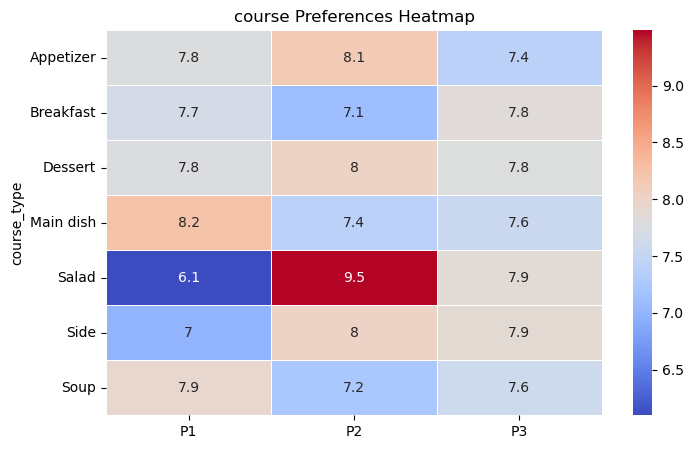

In [82]:
plt.figure(figsize=(8, 5))
sns.heatmap(course_avg, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("course Preferences Heatmap")
plt.show()


In [79]:
subcategories_analysis = anaylsis_combined[['subcategories', 'P1', 'P2', 'P3']]
subcategories_avg = subcategories_analysis.groupby("subcategories").mean()
subcategories_avg


,P1,P2,P3
subcategories,,,
Clear,7.847678,6.957622,7.183365
Cream,7.719027,7.590133,7.939509
Legume,8.104979,7.590133,9.451796
Noodle,9.648784,7.115750,6.049149
Pottage,7.912003,7.471537,7.466919
Red orange,5.017368,6.641366,7.561437
batter,8.683906,8.538899,7.183365
beef,7.608756,7.386826,7.615447
cake,8.182169,7.210626,7.712665


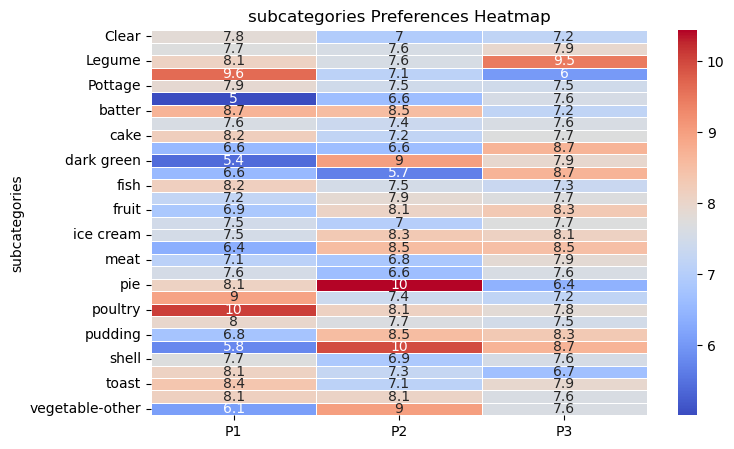

In [81]:
plt.figure(figsize=(8, 5))
sns.heatmap(subcategories_avg, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("subcategories Preferences Heatmap")
plt.show()

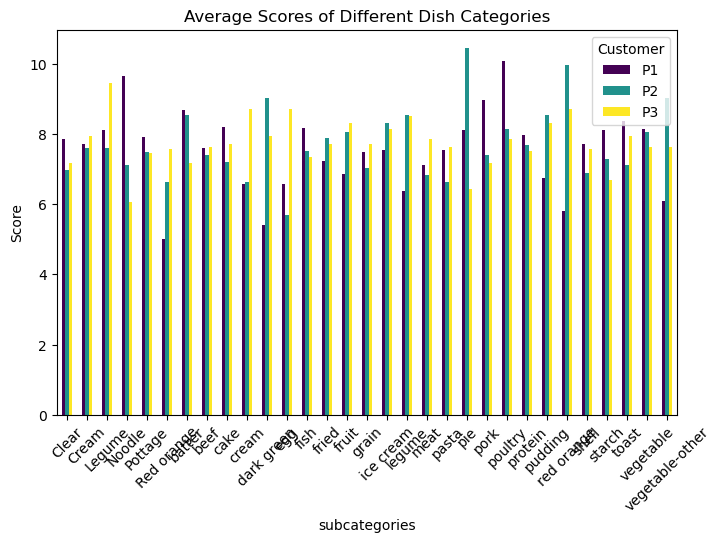

In [83]:
subcategories_avg.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title("Average Scores of Different Dish Categories")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Customer")
plt.show()


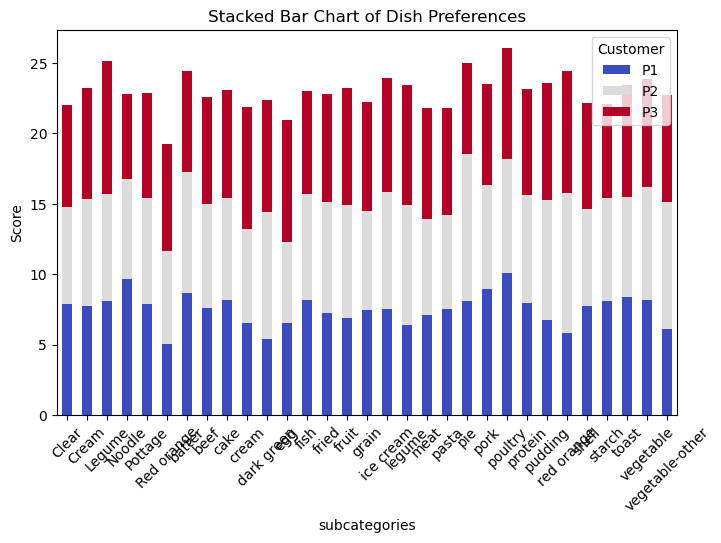

In [84]:
subcategories_avg.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("Stacked Bar Chart of Dish Preferences")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Customer")
plt.show()


In [86]:
nutrition_analysis = anaylsis_combined[['nf_calories', 'nf_sodium','nf_total_carbohydrate','nf_dietary_fiber','nf_protein','P1', 'P2', 'P3']]
nutrition_analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nf_calories            130 non-null    float64
 1   nf_sodium              126 non-null    float64
 2   nf_total_carbohydrate  129 non-null    float64
 3   nf_dietary_fiber       122 non-null    float64
 4   nf_protein             128 non-null    float64
 5   P1                     130 non-null    float64
 6   P2                     130 non-null    float64
 7   P3                     130 non-null    float64
dtypes: float64(8)
memory usage: 8.3 KB


In [88]:
nutrition_analysis_no_missing = nutrition_analysis.dropna(how='any')
nutrition_analysis_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 129
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nf_calories            121 non-null    float64
 1   nf_sodium              121 non-null    float64
 2   nf_total_carbohydrate  121 non-null    float64
 3   nf_dietary_fiber       121 non-null    float64
 4   nf_protein             121 non-null    float64
 5   P1                     121 non-null    float64
 6   P2                     121 non-null    float64
 7   P3                     121 non-null    float64
dtypes: float64(8)
memory usage: 8.5 KB


In [91]:
# 提取前四列（营养元素列）和后三列（顾客打分列）
nutrition_columns = nutrition_analysis_no_missing[['nf_calories', 'nf_sodium','nf_total_carbohydrate','nf_dietary_fiber','nf_protein']]
score_columns = nutrition_analysis_no_missing[['P1', 'P2', 'P3']]


